In [1]:
import warnings
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

# Principal Component Analysis dan Kmeans

In [2]:
# READ DATASET
df = pd.read_csv('./kendaraan_train_clean_full.csv')

## Membuat 2 komponen PCA

In [3]:
pca = PCA(2)
 
#Transform the data
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca.columns = ['c1', 'c2']

In [4]:
df_pca.sample(8)

,c1,c2
55958,-2.440952,0.138644
238886,-2.315644,0.256120
268312,-1.530688,-0.940277
181574,0.111043,-1.755566
156628,-0.864223,-2.231478
199025,1.101081,-0.950171
31508,1.370900,-0.708484
176788,0.410690,2.213435


## Memilih 2 kolom yang dihasilkan PCA

In [5]:
SELECTED_COLUMN=["c1","c2"]

In [6]:
@jit #comment this line if you can't run this file
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
    
def initCentroid(k, df):
  return {i: df[random.randint(0, len(df))] for i in range(k)}

@jit
def kmeans(k, max_iter, df):
    # inisiasi centroid
    centroid = initCentroid(k, df)
    sum_wcss = 0
    print("="*40)
    print("INIT CENTROID")
    # menampilkan nilai cluster ke i
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")
    # membuat duplikat nilai centroid sekarang
    temp_centroid = centroid.copy()
    for i in range(max_iter):
        # membuat cluster baru
        cluster = {i: [] for i in range(k)}
        tmp = []        
        for x in df:
            # mencari nilai centroid terdekat
            # dengan metode euclidean
            dist = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(dist))
            cluster[dist.index(min(dist))].append(x)
        sum_wcss = sum(tmp)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("="*40)
        print(f"ITERASI KE-{i+1}")
        # menampilkan nilai per klaster
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")
        # berhenti jika nilai centroid sebelumnya sama dengan sekarang
        isMatch = True
        for j in range(k):
          if (temp_centroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print(f"BERHENTI PADA ITERASI KE {i+1}")
          break
        temp_centroid = centroid.copy()
    return centroid, cluster, sum_wcss

In [7]:
data = df_pca.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 100

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster, _ = kmeans(k, max_iter, data)

INIT CENTROID
Klaster 1: [ 1.7348057  -0.73114393]
Klaster 2: [-1.74616607  0.72339169]
Klaster 3: [ 1.84399977 -0.29603482]
Klaster 4: [-2.51977186  0.09046303]
ITERASI KE-1
Klaster 1: [ 0.60131552 -1.22609937]
Klaster 2: [-0.95835764  0.99971444]
Klaster 3: [1.89407398 0.46279231]
Klaster 4: [-1.99457172 -0.25320886]
ITERASI KE-2
Klaster 1: [ 0.38150004 -1.29966102]
Klaster 2: [-0.34888516  1.45344068]
Klaster 3: [1.97947577 0.355455  ]
Klaster 4: [-2.05176979  0.08777543]
ITERASI KE-3
Klaster 1: [ 0.28500926 -1.34005116]
Klaster 2: [0.0064738  1.66514766]
Klaster 3: [2.053466   0.09801095]
Klaster 4: [-2.03334593  0.15284836]
ITERASI KE-4
Klaster 1: [ 0.20616458 -1.37177744]
Klaster 2: [0.12650683 1.68791957]
Klaster 3: [2.04466501 0.01144667]
Klaster 4: [-2.00573267  0.1760146 ]
ITERASI KE-5
Klaster 1: [ 0.15828576 -1.40015747]
Klaster 2: [0.18895393 1.66737365]
Klaster 3: [ 2.03636562 -0.04763157]
Klaster 4: [-1.99730154  0.18312343]
ITERASI KE-6
Klaster 1: [ 0.12640685 -1.4231597

In [8]:
# membuat dataframe hasil clustering
df_cluster = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_cluster.append((c[0], c[1], key))

df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = SELECTED_COLUMN + ['Cluster']
df_cluster.sample(8)

,c1,c2,Cluster
226171,-1.276821,-0.730418,3
167676,2.075209,-0.105706,2
129093,1.499164,-0.553594,2
268676,-2.259237,0.280615,3
256006,-2.095047,0.415700,3
207024,-2.436055,0.145860,3
230209,-2.497058,0.075613,3
47097,-0.561152,-0.445980,0


## Melakukan visualisasi hasil clustering

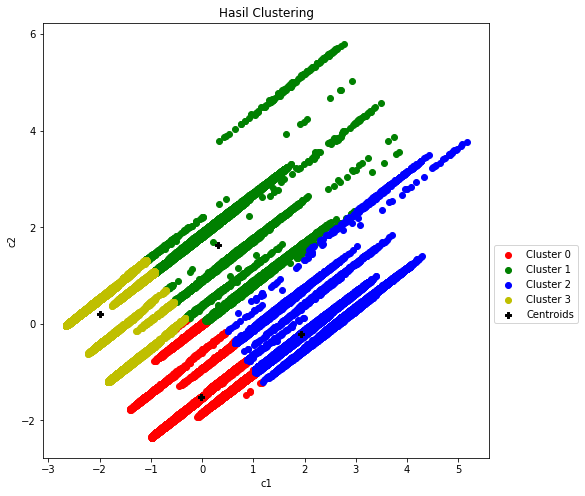

In [9]:
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(8, 8))
plt.title('Hasil Clustering')
for i in range(k):
    plt.scatter(
        df_cluster[SELECTED_COLUMN[0]][df_cluster['Cluster'] == i], 
        df_cluster[SELECTED_COLUMN[1]][df_cluster['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')
plt.xlabel(SELECTED_COLUMN[0])
plt.ylabel(SELECTED_COLUMN[1])
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

## Evaluasi nilai K dengan Elbow

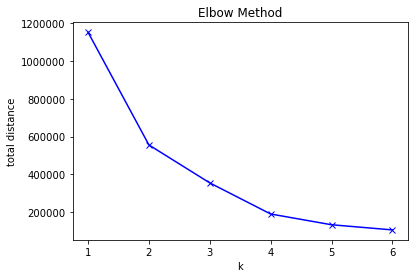

In [10]:
distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    distances.append(km.inertia_)

plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

## Menyimpan hasil dataframe

In [11]:
df_pca.to_csv('kendaraan_train_clean_pca.csv', encoding='utf-8', index=False)